In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re




import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings

In [60]:
data = pd.read_csv("makeinindia_tweets.csv")

In [61]:
data.head()
data.shape

(3211, 11)

In [63]:
data = data[['tweet', 'tidy_tweets','polarity']]
data.head()

,tweet,tidy_tweets,polarity
0,very bad worst,NaN,NaN
1,b'RT @DRDO_India: Indian badminton star @Pvsin...,NaN,NaN
2,b'RT @narendramodi: India missed the bus when ...,NaN,NaN
3,b'RT @PMOIndia: We look forward to making Indi...,NaN,NaN
4,b'RT @PMOIndia: We want to give our people ene...,\n \nWe want to make India a world leader\xe2\...,NaN


In [65]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [66]:
# remove twitter handles (@xxx)
#def clean_tweets(lst):
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tweet"], "RT @[\w]*:")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " @[\w]*")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "b'")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " b ")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " xae ")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " xbe ")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "xe")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "xa")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "xb")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "Ramesh")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "Abhishek")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " Mr. ")


#data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "co ")

data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " Xbe ")

data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "&amp[\w]*")
# remove special characters, numbers, punctuations
data['tidy_tweets'] = data['tidy_tweets'].str.replace("[^a-zA-Z#]", " ")
 
#data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], ".@[\w]*")
#data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "b")
    # remove URL links (httpxxx)
#data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], "https?://[A-Za-z0-9./]*")
data["tidy_tweets"] = np.vectorize(remove_pattern)(data["tidy_tweets"], " http.*?\s?(.*?) ")
     # remove special characters, numbers, punctuations
#data['tidy_tweets'] = data['tidy_tweets'].str.replace("[^a-zA-Z#]", " ")
#print([data['tweet'],data['tidy_tweets']])
data.head()

,tweet,tidy_tweets,polarity
0,very bad worst,very bad worst,NaN
1,b'RT @DRDO_India: Indian badminton star @Pvsin...,Indian badminton star became first woman to f...,NaN
2,b'RT @narendramodi: India missed the bus when ...,India missed the bus when it came to the firs...,NaN
3,b'RT @PMOIndia: We look forward to making Indi...,We look forward to making India a ten trillio...,NaN
4,b'RT @PMOIndia: We want to give our people ene...,We want to give our people energy security n ...,NaN


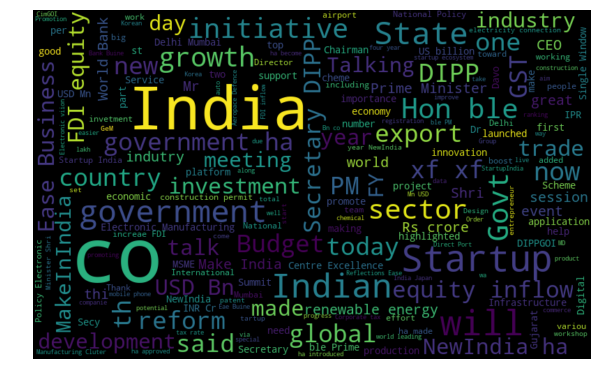

In [67]:
all_words = ' '.join([text for text in data['tidy_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
analyser = SentimentIntensityAnalyzer()
#s=data['tidy_tweets']
#print(s)

#blob=TextBlob(s)
#print(s,float(blob.sentiment.polarity))
for twe in data['tidy_tweets']:
    s=twe
    scor=analyser.polarity_scores(s)
    lb=scor['compound']
   # print (lb)
    if lb == 0:
        data['polarity']="neutral"
    elif lb < 0:
        data['polarity']="negative"
    else:  
        data['polarity']="positive"
data.head()

-0.847
-0.34
-0.1531
0.0
0.4588
0.0
-0.0951
0.0
0.0
0.0
0.0
0.34
0.802
0.4019
0.0
0.9022
0.4588
0.5106
0.4939
0.4939
0.7269
0.5719
0.0
0.3818
0.0
0.5106
0.25
0.8625
0.3182
0.2023
0.4336
0.6808
0.2023
0.3818
0.5994
0.8779
0.2023
0.6486
0.0
0.8074
0.0
0.3818
0.3818
0.0
0.0
0.34
0.0
0.0
0.0
0.0
0.1717
0.4767
0.4767
0.4767
0.0
-0.2263
0.0
0.1779
-0.5267
0.0
0.0
0.2023
0.0
0.128
0.0
0.0
0.5994
0.5994
0.5994
0.0
0.4019
0.0
0.34
0.0
0.7096
0.0
0.0
-0.34
0.0
0.0
0.0
0.4019
0.4019
0.0
0.5859
0.0
0.34
0.0258
0.6597
0.0
0.0
0.3818
0.1027
0.8176
0.1027
0.0
0.0
0.0
0.4404
0.6249
0.0
0.0
0.0
0.5267
0.0
0.34
0.5267
0.4215
0.6597
0.0
0.2732
0.0
0.0
0.34
0.0
0.2023
0.2732
0.2732
0.0
0.0
0.2023
0.765
0.0
0.0
0.3818
0.34
0.6369
0.0
0.5859
0.0
0.743
-0.6908
0.34
-0.0772
0.0
0.0
0.0
0.4588
0.0
0.0
0.0
0.34
0.5106
-0.7964
0.5423
0.2732
0.0
0.0
0.0
0.3818
0.0
0.4019
0.0
0.0
0.1027
0.6801
0.4019
0.4019
0.0
0.34
0.6249
0.6249
0.5859
0.0
0.34
0.1027
0.4019
0.0
0.0
0.8271
0.7096
0.0
0.34
0.34
0.34
0.34
0.0
0.0
0

0.0
0.0
0.0
0.5267
0.0
0.6249
0.7184
0.5719
0.3818
0.1027
0.7717
0.5994
0.7717
0.0
0.4767
0.1531
0.0
0.0
0.0
0.34
0.0
0.3818
0.3818
0.34
0.0
0.0
0.0
0.0
0.0
0.5719
0.368
0.0
-0.0258
0.0
-0.2732
-0.2732
-0.2732
0.0
-0.4767
0.7579
0.3818
0.0
0.0
0.4404
0.0
0.25
0.3818
0.3612
0.3182
0.0
0.0
0.4588
0.0
0.0
0.0
0.0
0.8442
0.4019
0.34
0.34
0.0
0.0
0.6369
0.0
0.0
0.6486
0.0
0.6908
-0.1027
0.0
0.0
0.743
0.3612
0.0
0.4754
0.0
0.0
0.4767
0.0
0.0
0.0
0.2263
0.2732
-0.2732
0.0
0.2732
0.1027
0.4404
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6124
0.34
0.34
0.34
0.34
0.0
0.6369
0.2023
0.6249
0.128
0.0
0.6249
0.4019
0.0
0.2732
0.4019
0.0
0.128
0.0
0.0
0.368
0.25
0.4019
0.4767
0.4019
0.1027
0.34
0.34
0.34
0.0
0.0
0.0
0.6447
0.0
0.0
0.4576
0.0
0.3182
0.0
0.0
-0.0258
0.0
-0.0258
-0.2732
0.128
0.4754
0.0
0.4019
0.8779
0.8689
0.5267
0.0
0.3612
0.0
0.5994
0.4019
0.4939
0.4767
0.4588
0.5106
0.0
0.5994
0.0
0.3818
0.25
0.8885
0.3612
0.4767
0.6249
0.5267
0.4588
0.0
0.0
0.6908
0.296
0.4215
0.0258
0.4019
0.6705
0.3818
0.3818


-0.128
0.0
0.0
-0.0772
0.0
0.2732
0.2023
0.0
0.0
0.128
0.3182
0.0
0.6249
0.0
0.0
0.6369
0.6597
0.6486
0.7717
0.1779
0.2023
0.5574
0.0
0.0
0.0
0.0
0.0
0.6908
0.5574
0.0
0.128
0.6037
0.0
0.0
0.0
0.0
0.0
0.3182
0.3818
0.0
0.4588
0.25
0.0
0.0
0.0772
0.7845
0.0
0.0
0.2023
0.34
0.1027
0.0
0.0
0.0
0.0
0.3612
0.0
0.0
0.6808
0.0
0.3182
0.4939
0.4019
0.3818
0.0
0.25
-0.4404
0.0
-0.4767
0.1027
0.0
0.0
-0.4767
0.5106
0.0
0.34
0.0
0.5106
0.5106
0.0772
0.4767
0.0
0.4019
0.4404
0.3818
0.3384
0.3818
0.4939
0.7506
0.5106
0.0
0.0
0.2732
0.0
0.0
0.7783
0.0
0.6597
0.0
0.0
0.0
-0.3818
0.4939
0.3612
0.2263
0.2732
0.0
0.0
0.0
0.6597
0.0
0.0
0.1027
0.0
0.3182
0.128
0.0
0.0
0.3182
0.34
-0.296
0.7096
0.0
0.0
0.0772
-0.2023
0.5859
0.6808
0.3612
0.3612
0.6597
-0.4767
0.3182
0.0
0.0
0.4767
0.5719
0.0
0.0
0.4939
0.0
0.0
0.6486
0.4767
0.0
-0.2023
0.5859
0.0
0.7269
0.0
0.0
0.0
0.0
0.3182
0.7184
-0.3182
0.4939
0.0
0.3612
0.4767
0.0
0.0
0.7506
0.0
0.4767
0.34
0.0
0.0
0.0
0.0
0.0
0.4767
0.0
0.8074
0.0
0.6249
0.4767
0.0


,tweet,tidy_tweets,polarity
0,very bad worst,very bad worst,neutral
1,b'RT @DRDO_India: Indian badminton star @Pvsin...,Indian badminton star became first woman to f...,neutral
2,b'RT @narendramodi: India missed the bus when ...,India missed the bus when it came to the firs...,neutral
3,b'RT @PMOIndia: We look forward to making Indi...,We look forward to making India a ten trillio...,neutral
4,b'RT @PMOIndia: We want to give our people ene...,We want to give our people energy security n ...,neutral


In [42]:
p=0
ne=0
n=0
for sa in data['polarity']:
    if (sa == "positive"):
        p = p + 1
    elif (sa == 'neutral'):
        ne = ne + 1
    else:
        n = n + 1
print(p)
print(ne)
print(n)

0
3211
0


In [11]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(data['tody_tweets'])
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [ ]:
sents = []
for tw in data['tidy_tweets']:
    try:
        st = sentiment_analyzer_scores(tw)
        sents.append(st)
    except:
        sents.append(0)
        ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
        ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of Make in india")
    